In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#load data
df = pd.read_csv("CreditCardUsage.csv")

In [3]:
df.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE,PRC_FULL_PAYMENT
0,41,95,0,95,0,0,2,1000.0,202,140.0,12,0
1,3202,0,0,0,6443,4,0,7000.0,4103,1072.0,12,0
2,2495,773,773,0,0,0,12,7500.0,622,627.0,12,0
3,1667,1499,1499,0,206,1,1,7500.0,0,NaN,12,0
4,818,16,16,0,0,0,1,1200.0,678,245.0,12,0


In [4]:
#Check for null values
df.isna().sum()

BALANCE                     0
PURCHASES                   0
ONEOFF_PURCHASES            0
INSTALLMENTS_PURCHASES      0
CASH_ADVANCE                0
CASH_ADVANCE_TRX            0
PURCHASES_TRX               0
CREDIT_LIMIT                1
PAYMENTS                    0
MINIMUM_PAYMENTS          313
TENURE                      0
PRC_FULL_PAYMENT            0
dtype: int64

In [5]:
#Remove null values
df.dropna(inplace = True)

In [6]:
#Check for null values
df.isna().sum()

BALANCE                   0
PURCHASES                 0
ONEOFF_PURCHASES          0
INSTALLMENTS_PURCHASES    0
CASH_ADVANCE              0
CASH_ADVANCE_TRX          0
PURCHASES_TRX             0
CREDIT_LIMIT              0
PAYMENTS                  0
MINIMUM_PAYMENTS          0
TENURE                    0
PRC_FULL_PAYMENT          0
dtype: int64

In [7]:
#Define x and y variables
x = df.drop('Grade', axis=1)
y = df['Grade']

KeyError: "['Grade'] not found in axis"

In [8]:
# Define the features (X) and the target variable (y) for the Random Forest Classifier model
X = df.drop(['Credit_Utilization', 'Utilization_Category'], axis=1)
y = df['Utilization_Category']


KeyError: "['Credit_Utilization', 'Utilization_Category'] not found in axis"

In [9]:
import pandas as pd

# Assuming df is already loaded
# Create 'Credit_Utilization' column
df['Credit_Utilization'] = df['BALANCE'] / df['CREDIT_LIMIT']

# Function to categorize credit utilization
def categorize_utilization(utilization):
    if utilization <= df['Credit_Utilization'].quantile(0.33):
        return 'Low'
    elif utilization <= df['Credit_Utilization'].quantile(0.66):
        return 'Medium'
    else:
        return 'High'

# Apply the function to create 'Utilization_Category'
df['Utilization_Category'] = df['Credit_Utilization'].apply(categorize_utilization)

# Define the features (X) and the target variable (y) for the Random Forest Classifier model
X = df.drop(['Credit_Utilization', 'Utilization_Category'], axis=1)
y = df['Utilization_Category']


In [10]:
# Define the features (X) and the target variable (y) for the Random Forest Classifier model
X = df.drop(['Credit_Utilization', 'Utilization_Category'], axis=1)
y = df['Utilization_Category']

In [11]:
#split dataset 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

NameError: name 'x' is not defined

In [12]:
#split dataset 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

NameError: name 'Y' is not defined

In [13]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [14]:
#create the model
LoanGDModel = RandomForestClassifier()
LoanGDModel.fit(x_train, y_train)

RandomForestClassifier()

In [15]:
#check result of training the model 
LoanGDModel.score(x_train, y_train)

1.0

In [16]:
#check result of test data 
LoanGDModel.score(x_test, y_test)

0.941721343110768

In [17]:
#create prediction
y_pred = LoanGDModel.predict(x_test)

In [18]:
#evaluate the model - confusion matrix
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[836   0  53]
 [  0 831  26]
 [ 59  13 773]]


In [19]:
#add the predicted and actual values into a new dataframe
LoanGDModel=pd.DataFrame({'Actual': y_test, 'predicted': y_pred})

In [20]:
#print the new dataframe
print(LoanGDModel)

      Actual predicted
4273  Medium    Medium
4216     Low       Low
3606    High      High
5094  Medium    Medium
360   Medium    Medium
...      ...       ...
8147    High      High
4839     Low       Low
2525     Low       Low
3281  Medium    Medium
3084    High      High

[2591 rows x 2 columns]


In [21]:
#Save the new dataframe to Excel
LoanGDModel.to_csv("CreditCardUsage.csv")

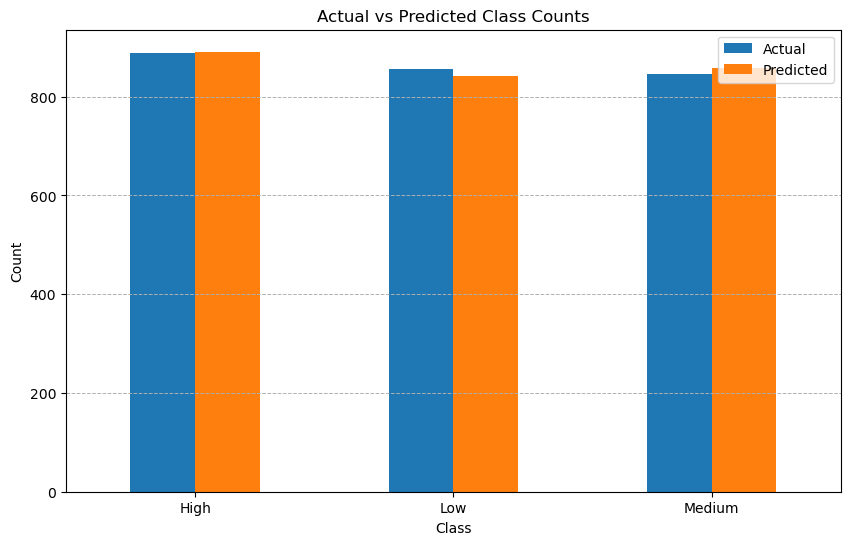

In [26]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Fit the Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# Predict on the test set
y_pred = clf.predict(x_test)

# Count the occurrences of each class in both the actual and predicted sets
actual_counts = y_test.value_counts().sort_index()
predicted_counts = pd.Series(y_pred).value_counts().sort_index()

# Create a DataFrame for easier plotting
comparison_df = pd.DataFrame({'Actual': actual_counts, 'Predicted': predicted_counts})

# Plot
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Actual vs Predicted Class Counts')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()


In [27]:
# Define the features (X) and the target variable (y) for the Random Forest Classifier model
X = df.drop(['Credit_Utilization', 'Utilization_Category'], axis=1)
y = df['Prc_Full_payment']

KeyError: 'Prc_Full_payment'